In [1]:
import warnings

warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from matplotlib.ticker import PercentFormatter
plt.rcParams.update({ "figure.figsize" : (8, 5),"axes.facecolor" : "white", "axes.edgecolor":  "black"})
plt.rcParams["figure.facecolor"]= "w"
pd.plotting.register_matplotlib_converters()
pd.set_option('display.float_format', lambda x: '%.3f' % x)

pd.options.display.float_format = '{:.2f}'.format

### Getting the data ###

In [2]:
#importing house sales data
sales = pd.read_csv('data/sales.csv')
sales.head()

,date,price,house_id,id
0,2014-10-13,221900.00,7129300520,1
1,2014-12-09,538000.00,6414100192,2
2,2015-02-25,180000.00,5631500400,3
3,2014-12-09,604000.00,2487200875,4
4,2015-02-18,510000.00,1954400510,5


In [3]:
# importing details of house sales data
details = pd.read_csv('data/details.csv')
details.head()

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,1000102,6.00,3.00,2400.00,9373.00,2.00,NaN,0.00,3,7,2400.00,0.00,1991,0.00,98002,47.33,-122.21,2060.00,7316.00
1,100100050,3.00,1.00,1320.00,11090.00,1.00,0.00,0.00,3,7,1320.00,0.00,1955,0.00,98155,47.77,-122.30,1320.00,8319.00
2,1001200035,3.00,1.00,1350.00,7973.00,1.50,NaN,0.00,3,7,1350.00,0.00,1954,0.00,98188,47.43,-122.29,1310.00,7491.00
3,1001200050,4.00,1.50,1260.00,7248.00,1.50,NaN,0.00,5,7,1260.00,0.00,1955,NaN,98188,47.43,-122.29,1300.00,7732.00
4,1003000175,3.00,1.00,980.00,7606.00,1.00,0.00,0.00,3,7,980.00,0.00,1954,0.00,98188,47.44,-122.29,980.00,8125.00


In [4]:
# id in details corresponds to house_id in sales, so the column name 'id' in details needs to be changed

details = details.rename({'id':'house_id'}, axis=1)
details.columns

Index(['house_id', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [5]:
# merging sales and details on house_id

house_data = pd.merge(sales, details, on=['house_id'], how='left' )
house_data.head()

,date,price,house_id,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,2014-10-13,221900.00,7129300520,1,3.00,1.00,1180.00,5650.00,1.00,NaN,...,7,1180.00,0.00,1955,0.00,98178,47.51,-122.26,1340.00,5650.00
1,2014-12-09,538000.00,6414100192,2,3.00,2.25,2570.00,7242.00,2.00,0.00,...,7,2170.00,400.00,1951,19910.00,98125,47.72,-122.32,1690.00,7639.00
2,2015-02-25,180000.00,5631500400,3,2.00,1.00,770.00,10000.00,1.00,0.00,...,6,770.00,0.00,1933,NaN,98028,47.74,-122.23,2720.00,8062.00
3,2014-12-09,604000.00,2487200875,4,4.00,3.00,1960.00,5000.00,1.00,0.00,...,7,1050.00,910.00,1965,0.00,98136,47.52,-122.39,1360.00,5000.00
4,2015-02-18,510000.00,1954400510,5,3.00,2.00,1680.00,8080.00,1.00,0.00,...,8,1680.00,0.00,1987,0.00,98074,47.62,-122.05,1800.00,7503.00


### Getting to know the data ###

In [6]:
house_data.shape

(21597, 22)

In [7]:
house_data.columns

Index(['date', 'price', 'house_id', 'id', 'bedrooms', 'bathrooms',
       'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition',
       'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated',
       'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [8]:
house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           21597 non-null  object 
 1   price          21597 non-null  float64
 2   house_id       21597 non-null  int64  
 3   id             21597 non-null  int64  
 4   bedrooms       21597 non-null  float64
 5   bathrooms      21597 non-null  float64
 6   sqft_living    21597 non-null  float64
 7   sqft_lot       21597 non-null  float64
 8   floors         21597 non-null  float64
 9   waterfront     19206 non-null  float64
 10  view           21534 non-null  float64
 11  condition      21597 non-null  int64  
 12  grade          21597 non-null  int64  
 13  sqft_above     21597 non-null  float64
 14  sqft_basement  21145 non-null  float64
 15  yr_built       21597 non-null  int64  
 16  yr_renovated   17749 non-null  float64
 17  zipcode        21597 non-null  int64  
 18  lat   

In [9]:
# type of first date entry
type(house_data['date'][0])

str

In [10]:
house_data.date

0        2014-10-13
1        2014-12-09
2        2015-02-25
3        2014-12-09
4        2015-02-18
            ...    
21592    2014-05-21
21593    2015-02-23
21594    2014-06-23
21595    2015-01-16
21596    2014-10-15
Name: date, Length: 21597, dtype: object

In [11]:
# the date columns is in string format, it needs to be converted to datetime with formate %Y/%m/%d
house_data['date'] = pd.to_datetime(house_data['date'], format='%Y-%m-%d')

In [12]:
# checking type of first date entry
type(house_data['date'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [13]:
# checking for missing values
house_data.isna().sum()

date                0
price               0
house_id            0
id                  0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2391
view               63
condition           0
grade               0
sqft_above          0
sqft_basement     452
yr_built            0
yr_renovated     3848
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [14]:
# import missingno for visualizing missing values
import missingno as msno

<Axes: >

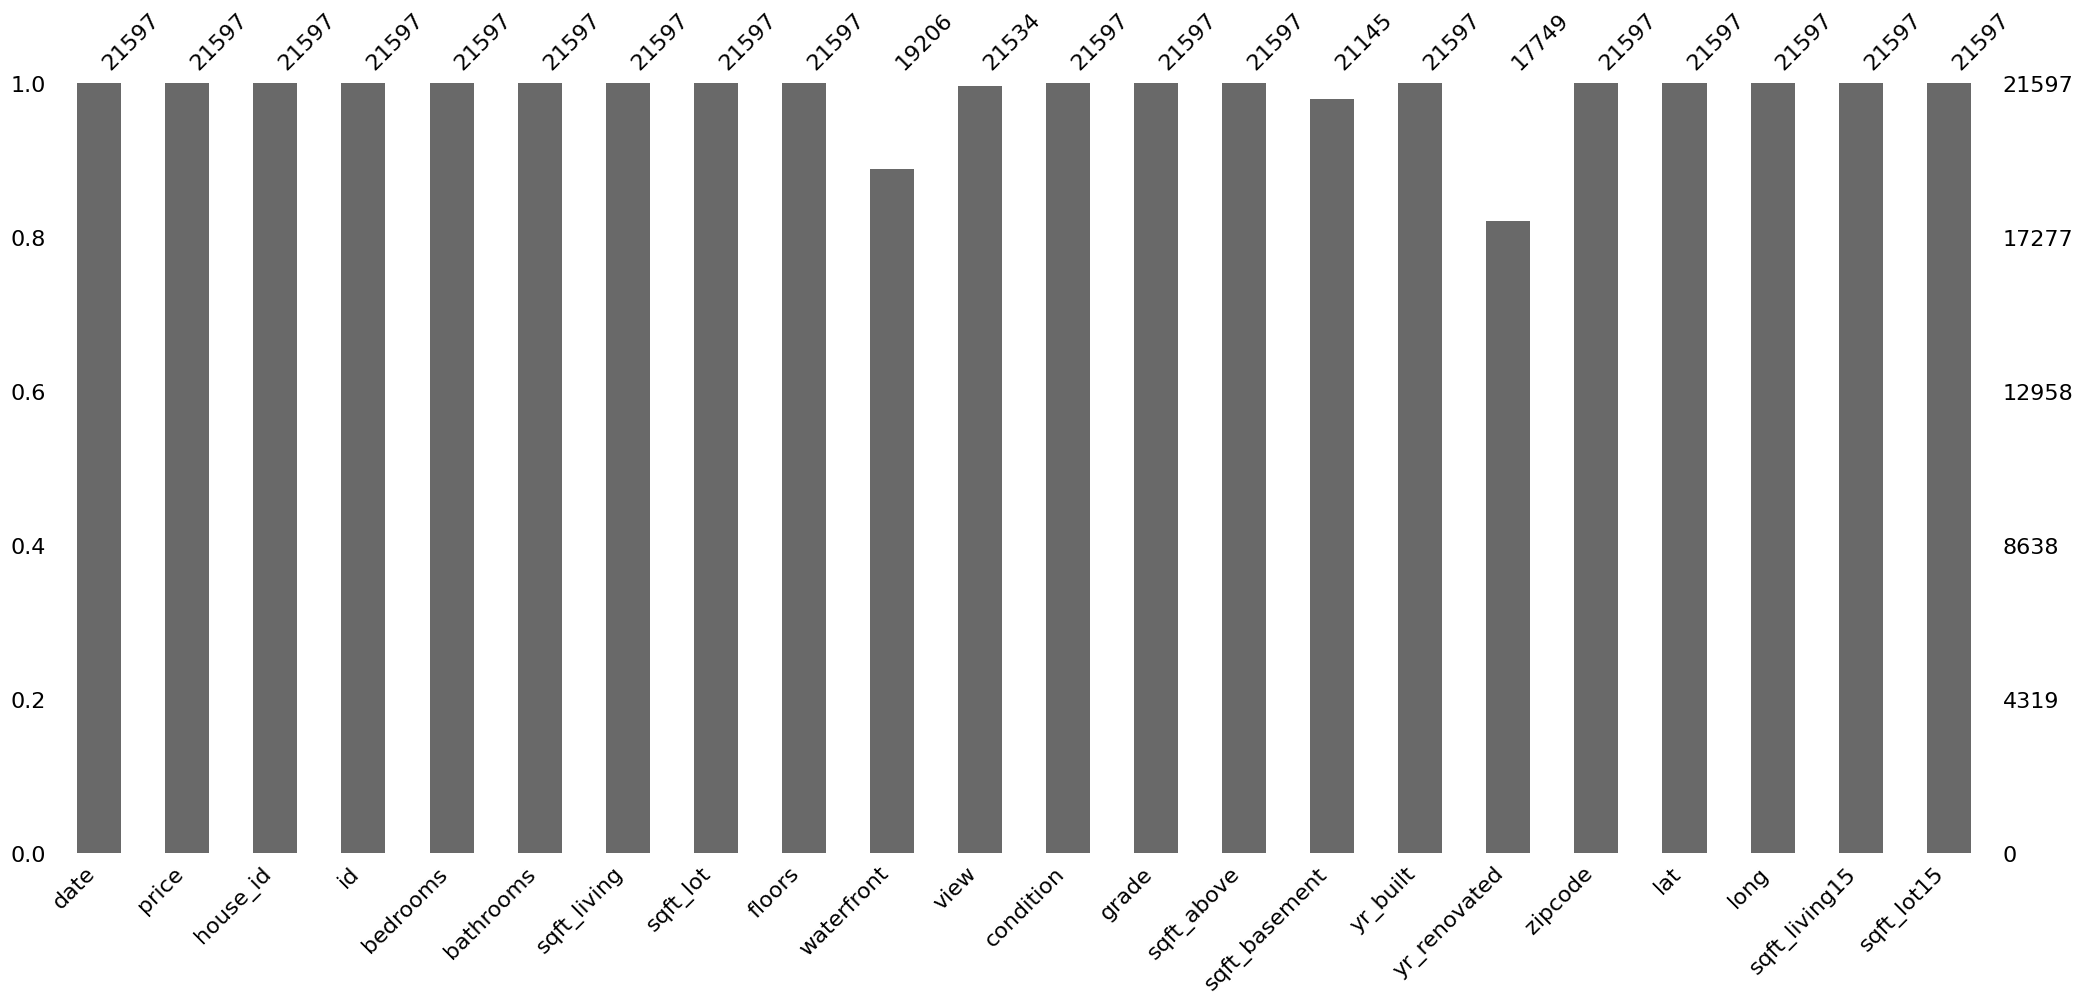

In [15]:
# plotting percentage of missing values per column
msno.bar(house_data)

In [16]:
# Cheking for rows with same id
duplicates = house_data[house_data.duplicated(subset=['id'])]
print(len(duplicates))

0


### Business case ###
#### Stakeholder requirements: ####
* 3 - 6 bedrooms
* 2 bathrooms
* with a basement (preferred)
* in a condition that allows to move in immediately
* in a nice environment
* below the median price

#### Defining the dataframe ####

In [17]:
#keeping only relevant columns
house_data_reduced = house_data.drop(["sqft_lot", "floors", "sqft_lot15", "waterfront", "yr_built", "view", "grade", "yr_renovated", ], axis=1).copy()

In [18]:
house_data_reduced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           21597 non-null  datetime64[ns]
 1   price          21597 non-null  float64       
 2   house_id       21597 non-null  int64         
 3   id             21597 non-null  int64         
 4   bedrooms       21597 non-null  float64       
 5   bathrooms      21597 non-null  float64       
 6   sqft_living    21597 non-null  float64       
 7   condition      21597 non-null  int64         
 8   sqft_above     21597 non-null  float64       
 9   sqft_basement  21145 non-null  float64       
 10  zipcode        21597 non-null  int64         
 11  lat            21597 non-null  float64       
 12  long           21597 non-null  float64       
 13  sqft_living15  21597 non-null  float64       
dtypes: datetime64[ns](1), float64(9), int64(4)
memory usage: 2.3 MB


In [19]:
# sqft_basement has missing values, we will replace them with 0


house_data_reduced['sqft_basement'] = house_data_reduced['sqft_basement'].fillna(0)


In [20]:
print(house_data_reduced['sqft_basement'].isna().sum())

0


#### Visualizing the distribution of numberic columns ####

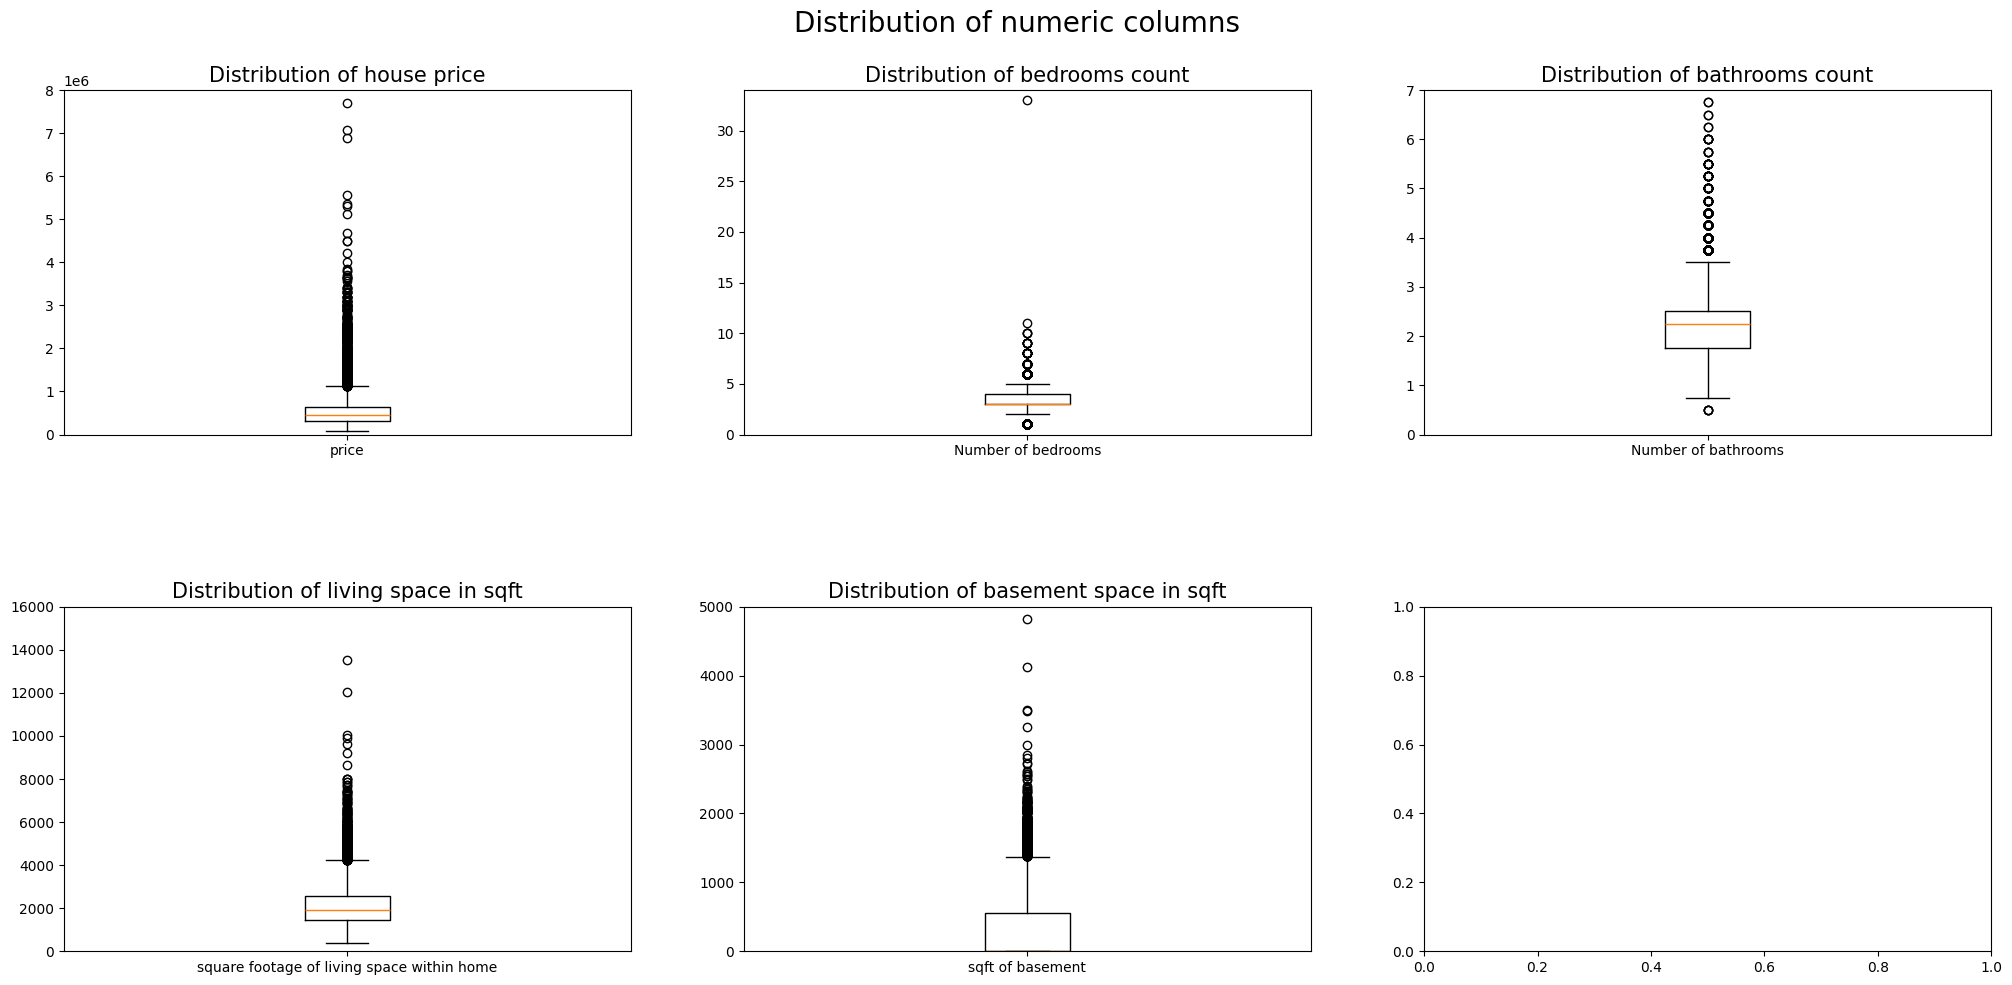

In [21]:
fig, ax = plt.subplots(2,3, figsize=(20,10)) # create subplots on 2 rows and 3 columns
plt.suptitle('Distribution of numeric columns', fontsize=20)
fig.tight_layout() # tight_layout automatically adjusts subplot params so that the subplot(s) fits in to the figure area
plt.subplots_adjust(hspace = .5, wspace = .2, top = .9) # adjusts the space between the single subplots

ax[0][0].boxplot(x = house_data_reduced['price']) 
ax[0][0].set_xticklabels(labels=["price"]) 
ax[0][0].set_ylim(0,8000000) 
ax[0][0].set_title("Distribution of house price", fontsize = 15);

ax[0][1].boxplot(x = house_data_reduced['bedrooms'])
ax[0][1].set_xticklabels(labels=["Number of bedrooms"])
ax[0][1].set_ylim(0,34)
ax[0][1].set_title("Distribution of bedrooms count", fontsize = 15);

ax[0][2].boxplot(x = house_data_reduced['bathrooms'])
ax[0][2].set_xticklabels(labels=["Number of bathrooms"])
ax[0][2].set_ylim(0,7)
ax[0][2].set_title("Distribution of bathrooms count", fontsize = 15);

ax[1][0].boxplot(x = house_data_reduced['sqft_living'])
ax[1][0].set_xticklabels(labels=["square footage of living space within home"])
ax[1][0].set_ylim(0,16000)
ax[1][0].set_title("Distribution of living space in sqft", fontsize = 15);
                              
ax[1][1].boxplot(x = house_data_reduced['sqft_basement'])
ax[1][1].set_xticklabels(labels=["sqft of basement"])
ax[1][1].set_ylim(0,5000)
ax[1][1].set_title("Distribution of basement space in sqft", fontsize = 15);

plt.subplots_adjust(hspace=0.5, wspace=0.2, top=0.9)
plt.show();
#fig.delaxes(ax[1][2]);

In [22]:
# checking the distribution of house price, which is skewed to the right
house_data['price'].describe()

count     21597.00
mean     540296.57
std      367368.14
min       78000.00
25%      322000.00
50%      450000.00
75%      645000.00
max     7700000.00
Name: price, dtype: float64

In [23]:
# rounding price to 2 decimal places
house_data_reduced['price'] = house_data_reduced['price'].round(2)



In [24]:
# highly skewed price data
house_data_reduced['price'].skew()

np.float64(4.023364652271239)

<Axes: >

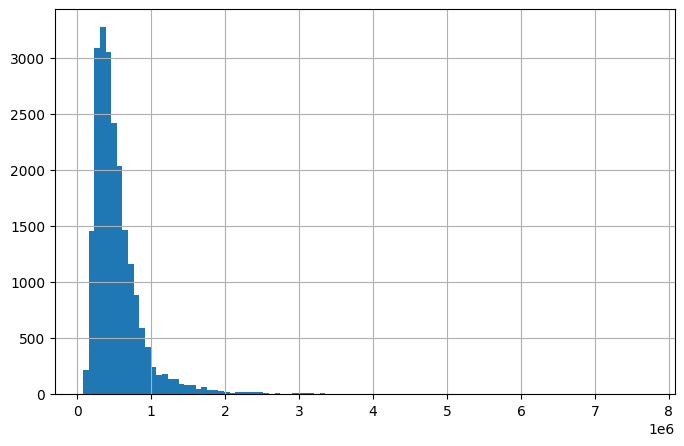

In [25]:
house_data_reduced['price'].hist(bins=100)

In [26]:
# Ckecking the high number of bedrooms in the dataset
house_data_reduced['bedrooms'].value_counts()

# 33 bedrooms seems to a typo, so we will replace it with 3
house_data_reduced.loc[house_data_reduced['bedrooms'] == 33, 'bedrooms'] = 3

In [27]:
#checking the number of bedrooms again
house_data_reduced['bedrooms'].value_counts()

bedrooms
3.00     9825
4.00     6882
2.00     2760
5.00     1601
6.00      272
1.00      196
7.00       38
8.00       13
9.00        6
10.00       3
11.00       1
Name: count, dtype: int64

<Axes: xlabel='sqft_basement'>

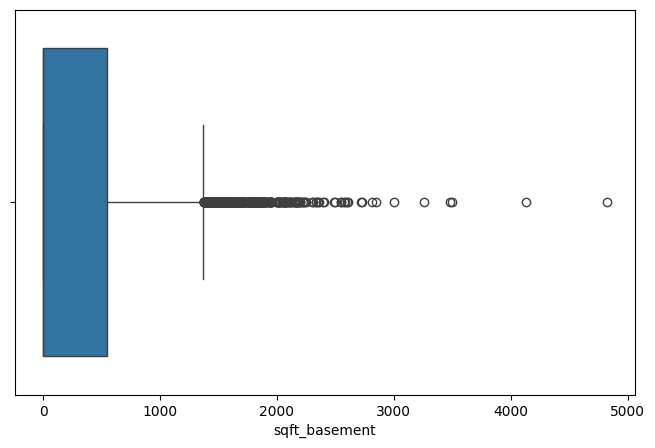

In [28]:
# There seem to be unrealistically high values for basements
sns.boxplot(x='sqft_basement', data=house_data_reduced)

<Axes: xlabel='sqft_living15'>

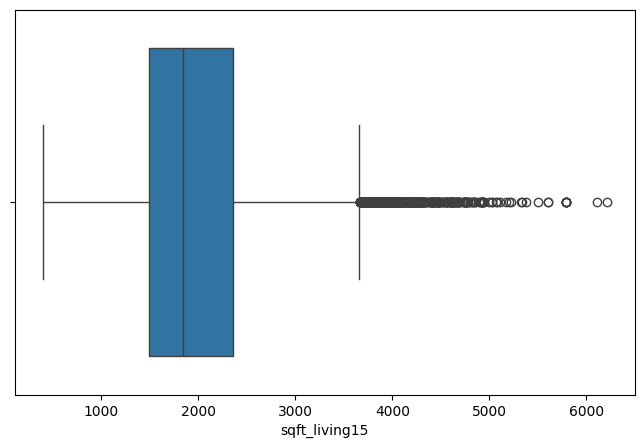

In [29]:
sns.boxplot(x='sqft_living15', data=house_data_reduced)

### Handling outliers ####

In [30]:
# IQR Outlier Detection
# Function to remove outliers using IQR
def remove_outliers_iqr(df, columns):
    df_filtered = df.copy()
    for column in columns:
        Q1 = df_filtered[column].quantile(0.25)
        Q3 = df_filtered[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df_filtered = df_filtered[(df_filtered[column] >= lower_bound) & (df_filtered[column] <= upper_bound)]
    return df_filtered

# List of columns to remove outliers from
columns_to_filter = ['sqft_basement', 'sqft_living', 'sqft_above', 'sqft_living15']

# Remove outliers
house_no_outliers = remove_outliers_iqr(house_data_reduced, columns_to_filter)

# Display the DataFrame without outliers in the defined columns
print(house_no_outliers)


            date     price    house_id     id  bedrooms  bathrooms  \
0     2014-10-13 221900.00  7129300520      1      3.00       1.00   
1     2014-12-09 538000.00  6414100192      2      3.00       2.25   
2     2015-02-25 180000.00  5631500400      3      2.00       1.00   
3     2014-12-09 604000.00  2487200875      4      4.00       3.00   
4     2015-02-18 510000.00  1954400510      5      3.00       2.00   
...          ...       ...         ...    ...       ...        ...   
21592 2014-05-21 360000.00   263000018  21593      3.00       2.50   
21593 2015-02-23 400000.00  6600060120  21594      4.00       2.50   
21594 2014-06-23 402101.00  1523300141  21595      2.00       0.75   
21595 2015-01-16 400000.00   291310100  21596      3.00       2.50   
21596 2014-10-15 325000.00  1523300157  21597      2.00       0.75   

       sqft_living  condition  sqft_above  sqft_basement  zipcode   lat  \
0          1180.00          3     1180.00           0.00    98178 47.51   
1        

In [31]:
house_no_outliers.info()


<class 'pandas.core.frame.DataFrame'>
Index: 19920 entries, 0 to 21596
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           19920 non-null  datetime64[ns]
 1   price          19920 non-null  float64       
 2   house_id       19920 non-null  int64         
 3   id             19920 non-null  int64         
 4   bedrooms       19920 non-null  float64       
 5   bathrooms      19920 non-null  float64       
 6   sqft_living    19920 non-null  float64       
 7   condition      19920 non-null  int64         
 8   sqft_above     19920 non-null  float64       
 9   sqft_basement  19920 non-null  float64       
 10  zipcode        19920 non-null  int64         
 11  lat            19920 non-null  float64       
 12  long           19920 non-null  float64       
 13  sqft_living15  19920 non-null  float64       
dtypes: datetime64[ns](1), float64(9), int64(4)
memory usage: 2.3 MB


### House attributes ###

BUILDING CONDITION (https://info.kingcounty.gov/assessor/esales/Glossary.aspx?type=r)
    	Relative to age and grade. Coded 1-5.

1 = Poor- Worn out. Repair and overhaul needed on painted surfaces, roofing, plumbing, heating and numerous functional inadequacies. Excessive deferred maintenance and abuse, limited value-in-use, approaching abandonment or major reconstruction; reuse or change in occupancy is imminent. Effective age is near the end of the scale regardless of the actual chronological age.

2 = Fair- Badly worn. Much repair needed. Many items need refinishing or overhauling, deferred maintenance obvious, inadequate building utility and systems all shortening the life expectancy and increasing the effective age.

3 = Average- Some evidence of deferred maintenance and normal obsolescence with age in that a few minor repairs are needed, along with some refinishing. All major components still functional and contributing toward an extended life expectancy. Effective age and utility is standard for like properties of its class and usage.

4 = Good- No obvious maintenance required but neither is everything new. Appearance and utility are above the standard and the overall effective age will be lower than the typical property.

5= Very Good- All items well maintained, many having been overhauled and repaired as they have shown signs of wear, increasing the life expectancy and lowering the effective age with little deterioration or obsolescence evident with a high degree of utility.)
    	Relative to age and grade. Coded 1-5.


<Axes: xlabel='condition'>

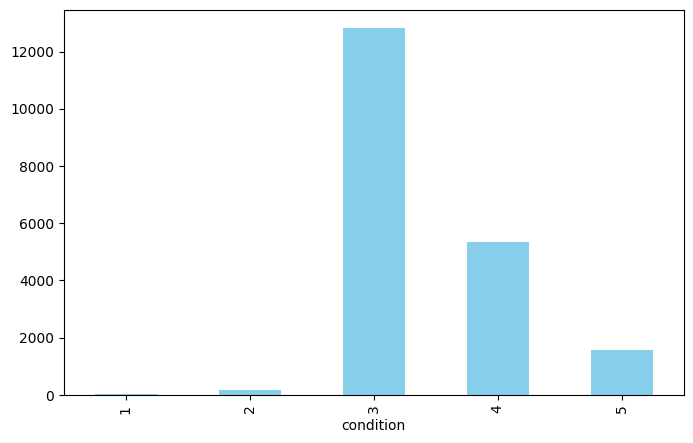

In [32]:
# bar chart for house condition 
house_no_outliers['condition'].value_counts().sort_index().plot(kind='bar', color='skyblue')

<Axes: xlabel='condition', ylabel='price'>

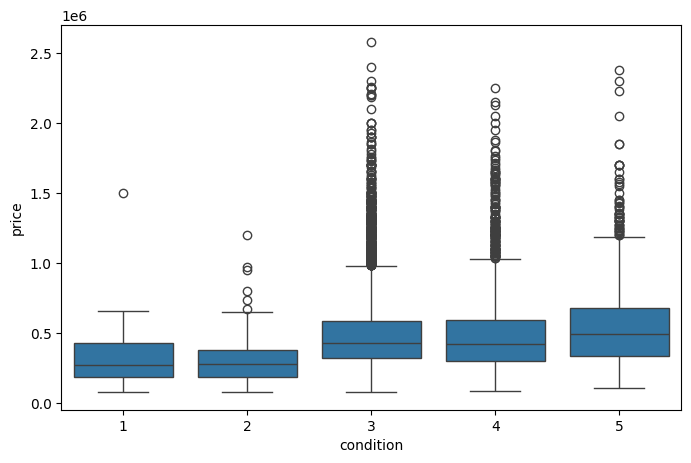

In [33]:
sns.boxplot(x="condition",y="price",data=house_no_outliers)

<Axes: xlabel='bedrooms', ylabel='price'>

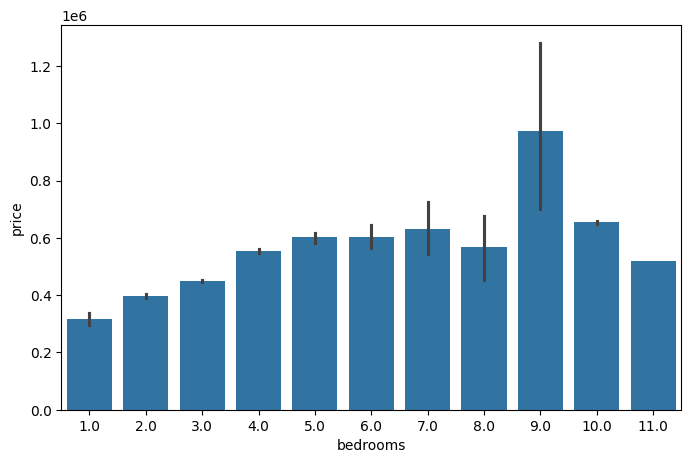

In [34]:
# number of bedrooms and price
sns.barplot(x='bedrooms', y='price', data=house_no_outliers)

<Axes: xlabel='bathrooms', ylabel='price'>

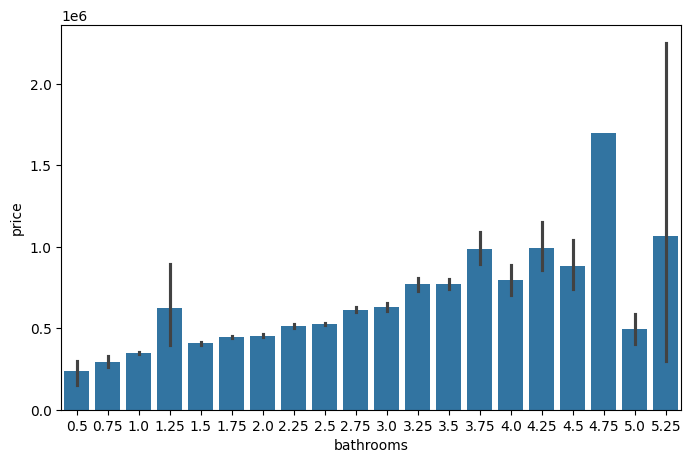

In [35]:
# number of bathrooms and price
# number of bedrooms
sns.barplot(x='bathrooms', y='price', data=house_no_outliers)

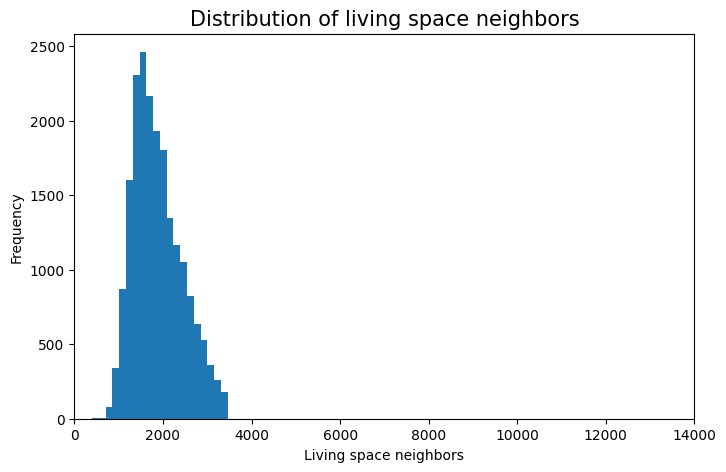

In [36]:
# Create a histogram for sqft living neighbors
plt.hist(x=house_no_outliers['sqft_living15'], bins=20)  # creates histogram for prices
plt.ylabel("Frequency", fontsize=10)  # sets the label for the y-axis
plt.xlabel("Living space neighbors", fontsize=10)  # sets the label for the x-axis
plt.xlim(0, 14000)  # limits the x-axis values from 0 to 1000000
plt.title("Distribution of living space neighbors", fontsize=15)  # sets the title for the plot

# Display the plot
plt.show()

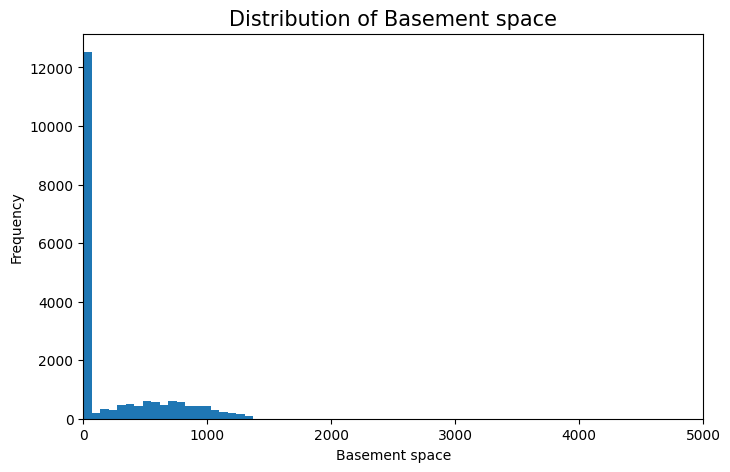

In [37]:
# Create a histogram for sqft basement
plt.hist(x=house_no_outliers['sqft_basement'], bins=20)  # creates histogram for prices
plt.ylabel("Frequency", fontsize=10)  # sets the label for the y-axis
plt.xlabel("Basement space", fontsize=10)  # sets the label for the x-axis
plt.xlim(0, 5000)  # limits the x-axis values from 0 to 1000000
plt.title("Distribution of Basement space", fontsize=15)  # sets the title for the plot

# Display the plot
plt.show()

In [38]:
# creating categorical variable for basement space 0= no basement available, 1 = basement available
#house_no_outliers['basement'] = np.where(house_no_outliers['sqft_basement'] > 0, 1, 0)
house_no_outliers['basement'] = np.where(house_no_outliers['sqft_basement'] > 0, 'basement available', 'no basement')


<Axes: xlabel='basement', ylabel='price'>

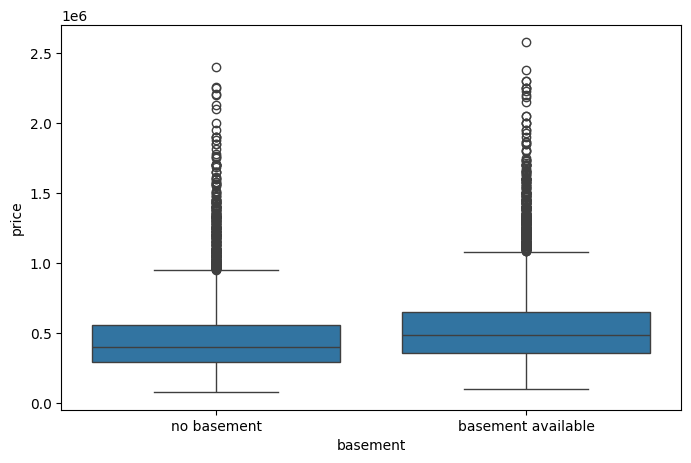

In [39]:
# plot basement vs price
sns.boxplot(x='basement', y='price', data=house_no_outliers)

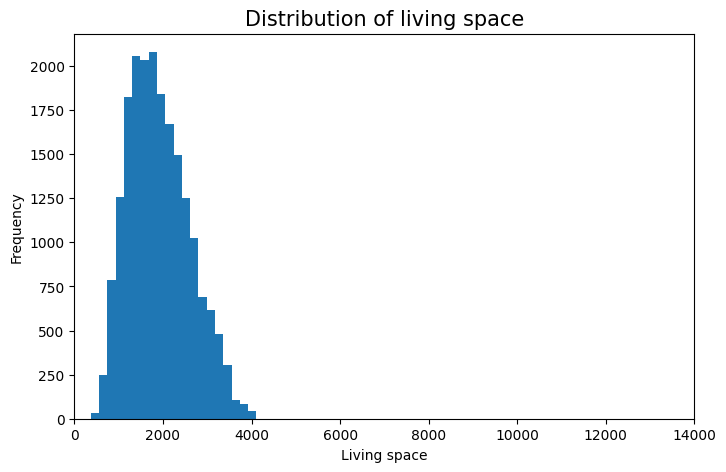

In [40]:
# Create a histogram for sqft living
plt.hist(x=house_no_outliers['sqft_living'], bins=20)  # creates histogram for prices
plt.ylabel("Frequency", fontsize=10)  # sets the label for the y-axis
plt.xlabel("Living space", fontsize=10)  # sets the label for the x-axis
plt.xlim(0, 14000)  # limits the x-axis values from 0 to 1000000
plt.title("Distribution of living space", fontsize=15)  # sets the title for the plot

# Display the plot
plt.show()

### checking correlations between variables ###

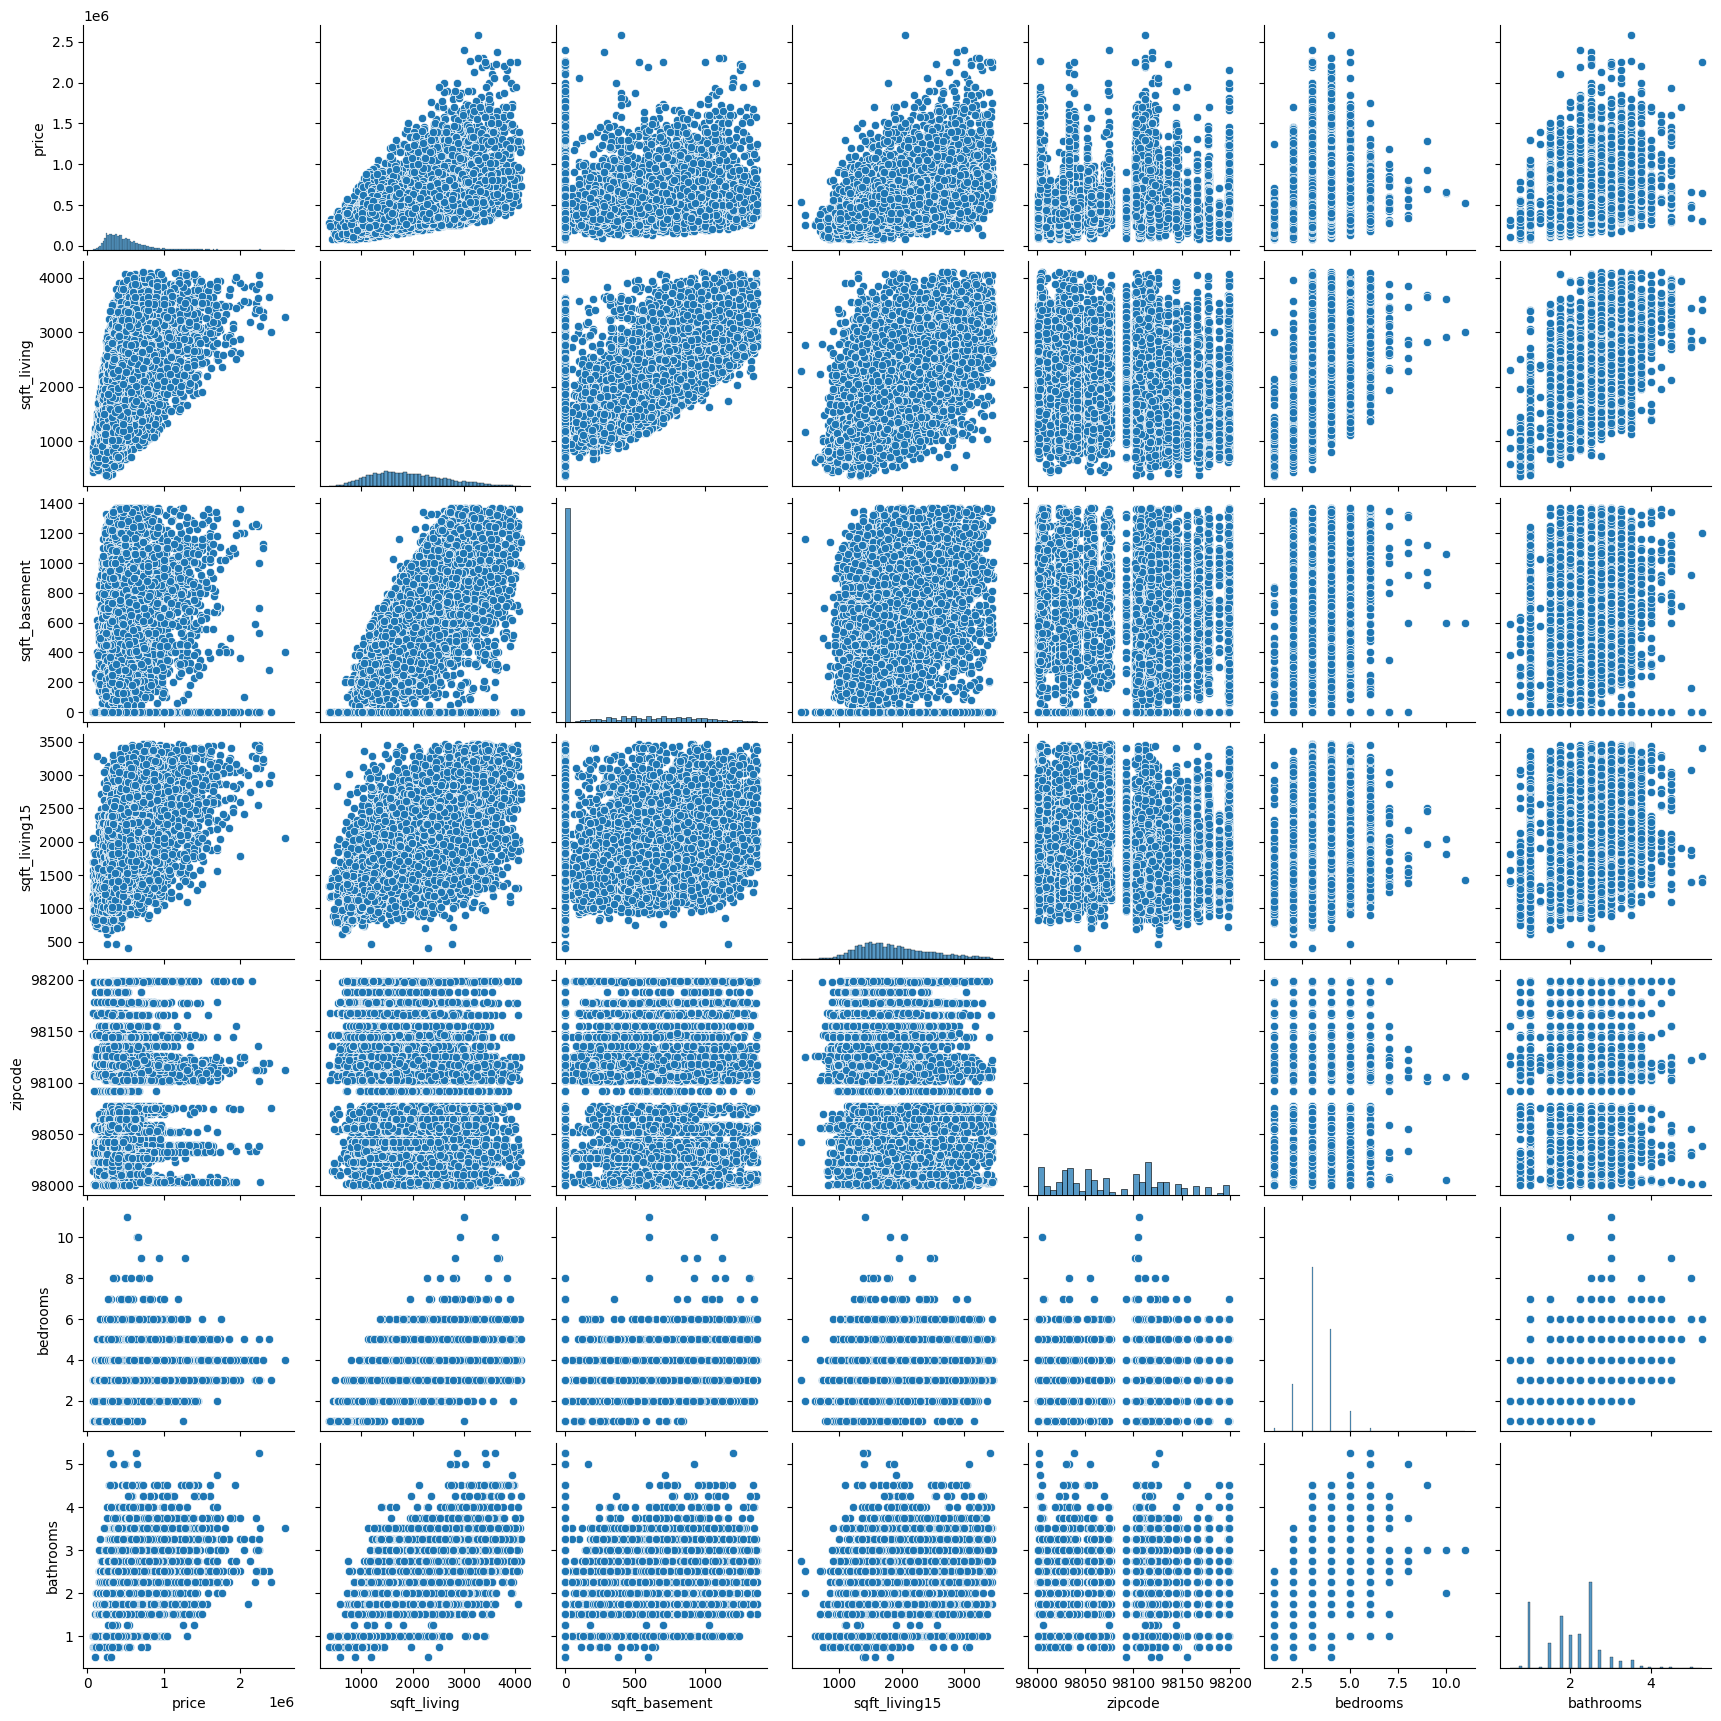

In [41]:
X3 = house_no_outliers[['price', 'sqft_living', 'sqft_basement', 'sqft_living15', 'zipcode', 'bedrooms', 'bathrooms']]
sns.pairplot(X3);

In [55]:
#strenghth of the correlations
X3.corr()['price'].sort_values()

zipcode         0.02
sqft_basement   0.23
bedrooms        0.26
bathrooms       0.42
sqft_living15   0.50
sqft_living     0.59
price           1.00
Name: price, dtype: float64

### Hypotheses ###

#### Is there a relationship between house attributes and the house price? ####
#### H1: The more bedrooms available, the higher the price of the house ####
#### H2: The better the condition of the house, the higher the price of the house ####
#### H3: The larger the living area of the house, the higher the house price ####

In [42]:
# Stakeholder requirements:
# >= 3 rooms and <=6 rooms
# to prevent renovation costs: condition >= 3
# needs 2 bathrooms, not more and not less

house_required = house_no_outliers.copy()

house_required = house_required.query('bedrooms >= 3.0 and bedrooms <= 6.0 and bathrooms ==2.0 and condition >=3')

In [43]:
house_required.condition.unique()

array([3, 5, 4])

In [44]:
house_required[['bathrooms', 'bedrooms']] = house_required[['bathrooms', 'bedrooms']].astype('int64')

In [45]:
house_required.price.median()

np.float64(417500.0)

In [46]:
# Creating a variable containing 0= below the median prize, 1= above the median price
# Step 1: Calculate the average price
median_price = house_required['price'].median()

# Step 2: Create a new column based on the average price
house_required['price_category'] = house_required['price'].apply(lambda x: 1 if x > median_price else 0)
# Step 3: Map the numerical categories to descriptive labels
house_required['price_category'] = house_required['price_category'].map({0: 'Below the median price', 1: 'Above the median price'})
# Display the DataFrame with the new column
print(house_required)


            date     price    house_id     id  bedrooms  bathrooms  \
4     2015-02-18 510000.00  1954400510      5         3          2   
14    2015-03-12 530000.00  1175000570     15         5          2   
16    2014-07-31 395000.00  1875500060     17         3          2   
25    2014-11-03 233000.00  1202000200     26         3          2   
37    2014-12-30 640000.00  2768000400     38         4          2   
...          ...       ...         ...    ...       ...        ...   
21422 2014-06-16 435000.00  2461900448  21423         3          2   
21426 2014-11-05 580000.00  8682320900  21427         3          2   
21515 2014-12-03 346000.00  5637500082  21516         3          2   
21534 2014-07-29 249000.00   880000205  21535         3          2   
21588 2015-01-26 429000.00  9834201367  21589         3          2   

       sqft_living  condition  sqft_above  sqft_basement  zipcode   lat  \
4          1680.00          3     1680.00           0.00    98074 47.62   
14       

In [47]:
house_required.house_id.nunique()

1647

<Axes: xlabel='bedrooms', ylabel='price'>

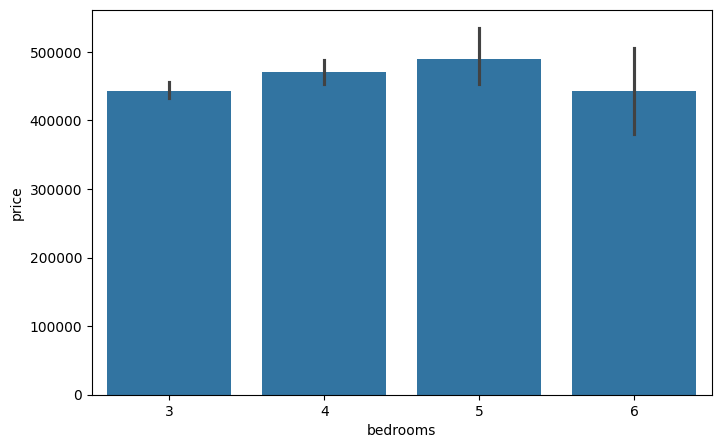

In [48]:
sns.barplot(x='bedrooms', y='price', data=house_required)

In [49]:
house_required_avg_price = house_required.groupby(['bedrooms', 'price_category', 'condition'])['price'].median().reset_index()
house_required_avg_price

,bedrooms,price_category,condition,price
0,3,Above the median price,3,529000.00
1,3,Above the median price,4,580000.00
2,3,Above the median price,5,626350.00
3,3,Below the median price,3,300000.00
4,3,Below the median price,4,275000.00
5,3,Below the median price,5,320000.00
6,4,Above the median price,3,559000.00
7,4,Above the median price,4,590000.00
8,4,Above the median price,5,630000.00
9,4,Below the median price,3,300000.00


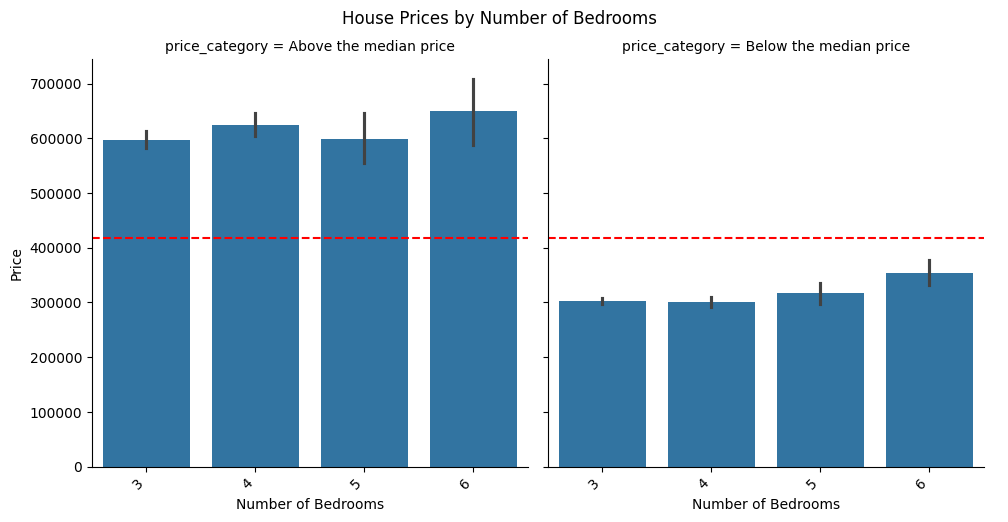

In [50]:
# Step 1: Group by 'bedrooms' and 'condition' and calculate the median prices
#median_prices = house_required.groupby(['bedrooms', 'condition'])['price'].median().reset_index()

# Step 2: Plot the result using sns.catplot
g= sns.catplot(x="bedrooms", y="price", #hue='condition', 
            col='price_category', kind="bar", data=house_required)

# Adding titles and labels
#plt.title('House Prices by Number of Bedrooms and Condition')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Price')



#Adding titles and labels
g.set_axis_labels("Number of Bedrooms", "Price")
g.fig.suptitle('House Prices by Number of Bedrooms', y=1.03)

# Customizing x-tick labels for each subplot
for ax in g.axes.flat:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
    ax.axhline(median_price, color='red', linestyle='--', label=f'Median Price: ${median_price:,.2f}')
    #ax.legend()
# Show the plot
plt.show()

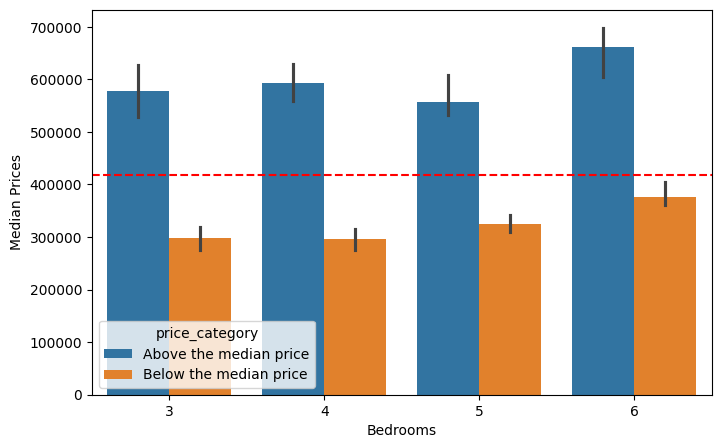

In [51]:
sns.barplot(x = house_required_avg_price['bedrooms'], y= house_required_avg_price['price'], hue = house_required_avg_price['price_category'],
              data = house_required_avg_price)
plt.xlabel('Bedrooms')
plt.ylabel('Median Prices')
#plt.title('Number of bedrooms and average house prices')

# Calculate the overall mean price
median_price_overall = house_required['price'].median()

# Add a horizontal line indicating the mean price
plt.axhline(median_price_overall, color='red', linestyle='--', label=f'Mean Price: ${median_price_overall:,.2f}')
plt.show()

### Result 1: the more bedrooms in the house, the higher the house price ###

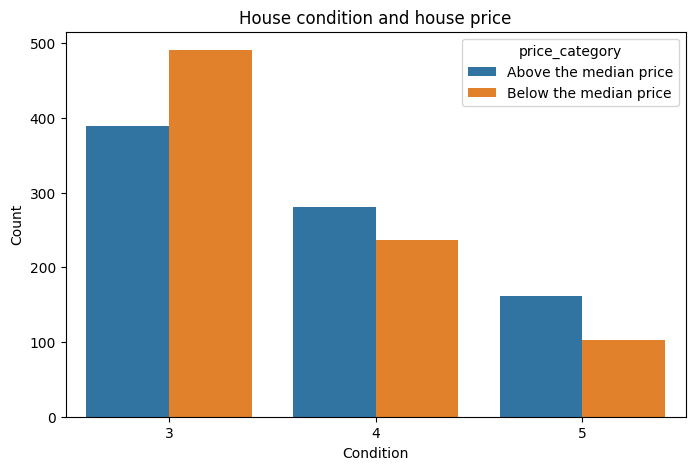

In [52]:
# Plot boxplot of sale month vs price
sns.countplot(x = house_required['condition'], hue=house_required['price_category'], data = house_required)
plt.xlabel('Condition')
plt.ylabel('Count')
plt.title('House condition and house price')
plt.show()

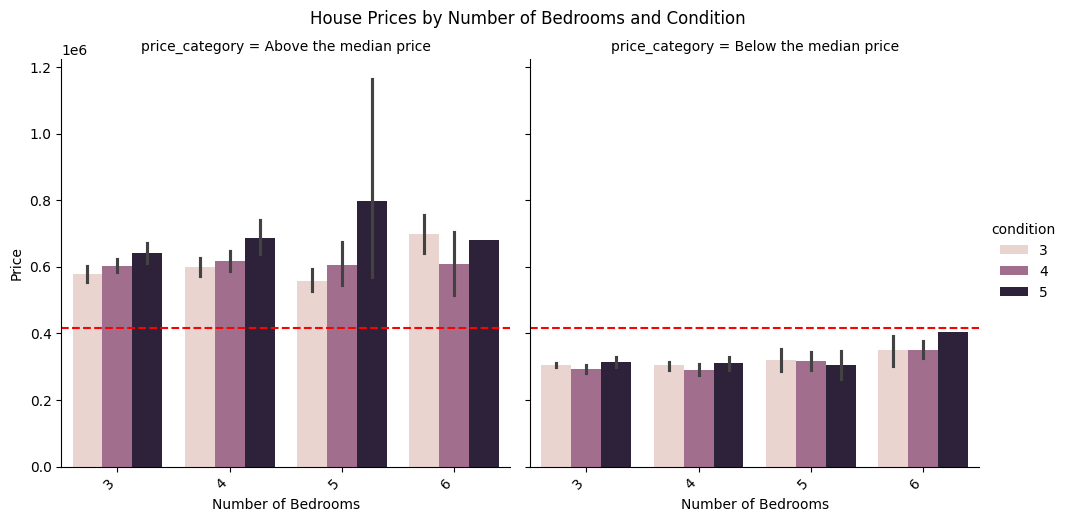

In [53]:
g= sns.catplot(x="bedrooms", y="price", hue='condition', 
            col='price_category', kind="bar", data=house_required)

# Adding titles and labels
#plt.title('House Prices by Number of Bedrooms and Condition')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Price')



#Adding titles and labels
g.set_axis_labels("Number of Bedrooms", "Price")
g.fig.suptitle('House Prices by Number of Bedrooms and Condition', y=1.03)

# Customizing x-tick labels for each subplot
for ax in g.axes.flat:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
    ax.axhline(median_price, color='red', linestyle='--', label=f'Median Price: ${median_price:,.2f}')
    #ax.legend()
# Show the plot
plt.show()

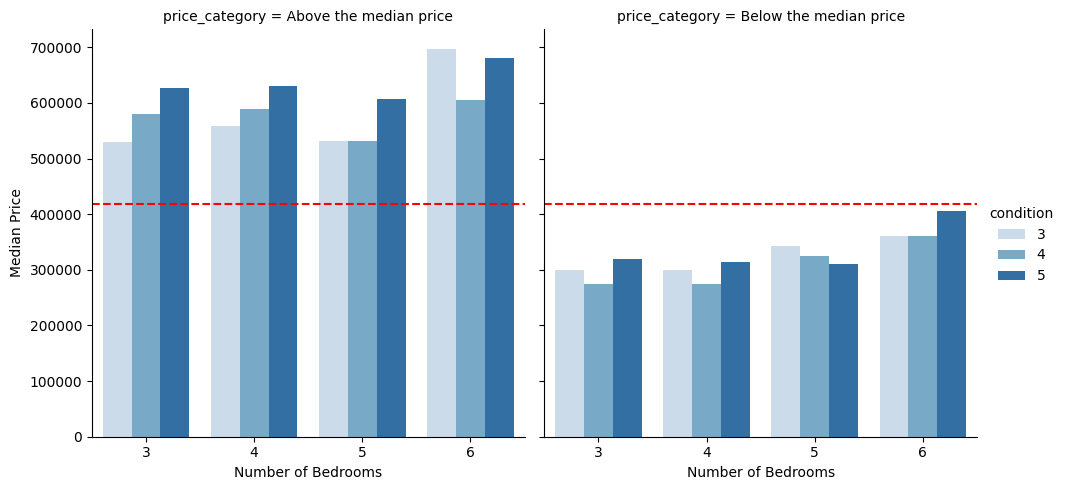

In [54]:
# Step 1: Group by 'bedrooms' and 'condition' and calculate the median prices
#median_prices = house_required.groupby(['bedrooms', 'condition'])['price'].median().reset_index()

blue_palette = sns.color_palette("Blues", n_colors=house_required_avg_price['condition'].nunique())
# Step 2: Plot the result using sns.catplot
g = sns.catplot(x="bedrooms", y="price", hue='condition', col='price_category', 
            kind="bar", data=house_required_avg_price, palette=blue_palette)

# Adding titles and labels
#Adding titles and labels
g.set_axis_labels("Number of Bedrooms", "Median Price")
#g.fig.suptitle('House Prices by Number of Bedrooms and Condition', y=1.03)
#plt.title('House Prices by Number of Bedrooms and Condition')
#plt.xlabel('Number of Bedrooms')
#plt.ylabel('Average Price')
# Calculate the overall mean price
median_price_overall = house_required['price'].median()

# Add a horizontal line indicating the mean price
# Customizing x-tick labels for each subplot
for ax in g.axes.flat:
    ax.axhline(median_price_overall, color='red', linestyle='--', label=f'Mean Price: ${median_price_overall:,.2f}')


# Show the plot
plt.show()

### Result 2: The better the house condition, the higher the house price ###

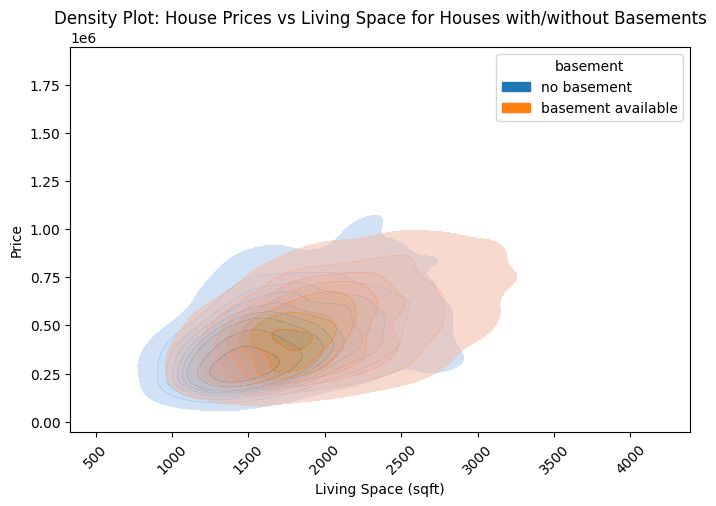

In [57]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.kdeplot(
    x='sqft_living', y='price', 
    hue='basement', 
    data=house_required, 
    fill=True,  # Adds color-filled density areas
    alpha=0.5   # Transparency for overlapping regions
)

plt.xlabel('Living Space (sqft)')
plt.ylabel('Price')
plt.title('Density Plot: House Prices vs Living Space for Houses with/without Basements')
plt.xticks(rotation=45)
plt.show()


### Results 3: The larger the living area, the higher the price. Basements are in all price categories available. ###

### H4: The nicer the location, the higher the house price ###
##### (nice location = large living area of the next 15 neighbors) #####

In [65]:
house_required.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1662 entries, 4 to 21588
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   date            1662 non-null   datetime64[ns]
 1   price           1662 non-null   float64       
 2   house_id        1662 non-null   int64         
 3   id              1662 non-null   int64         
 4   bedrooms        1662 non-null   int64         
 5   bathrooms       1662 non-null   int64         
 6   sqft_living     1662 non-null   float64       
 7   condition       1662 non-null   int64         
 8   sqft_above      1662 non-null   float64       
 9   sqft_basement   1662 non-null   float64       
 10  zipcode         1662 non-null   int64         
 11  lat             1662 non-null   float64       
 12  long            1662 non-null   float64       
 13  sqft_living15   1662 non-null   float64       
 14  basement        1662 non-null   object        
 15  price_ca

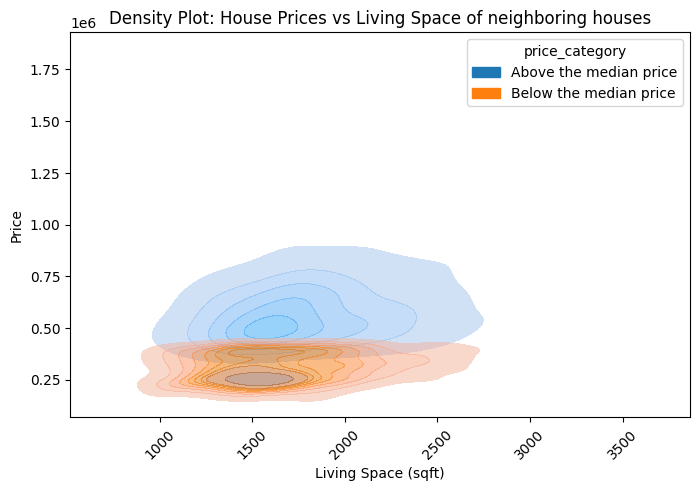

In [62]:
sns.kdeplot(
    x='sqft_living15', y='price', 
    hue='price_category', 
    data=house_required, 
    fill=True,  # Adds color-filled density areas
    alpha=0.5   # Transparency for overlapping regions
)

plt.xlabel('Living Space (sqft)')
plt.ylabel('Price')
plt.title('Density Plot: House Prices vs Living Space of neighboring houses')
plt.xticks(rotation=45)
plt.show()


### Result 4: There are fewer low price category houses in neighborhoods with larger living spaces

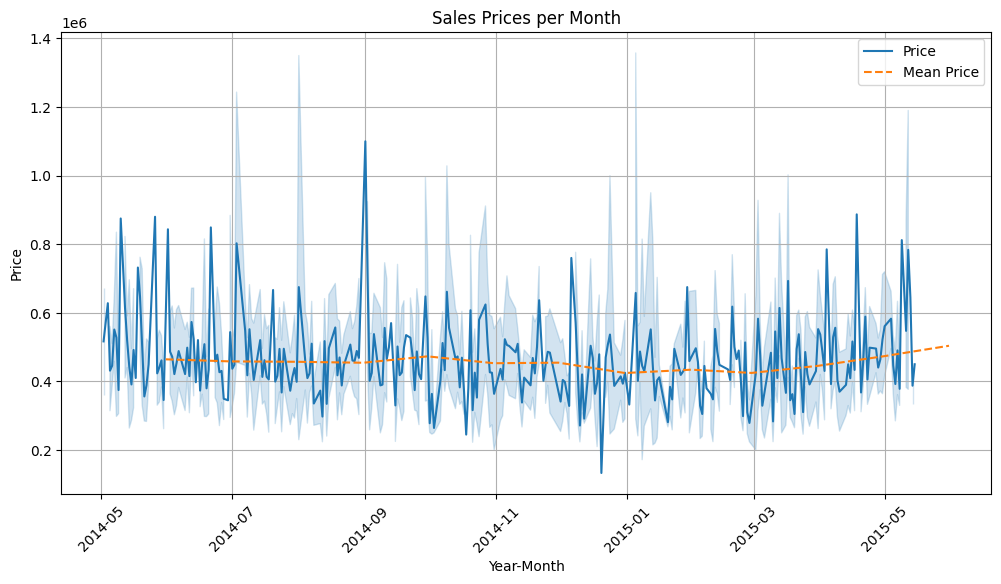

In [66]:

# Calculate mean prices per month
mean_prices_per_month = house_required.groupby(pd.Grouper(key='date', freq='M'))['price'].mean().reset_index()

# Plotting
plt.figure(figsize=(12, 6))

# Original line plot
sns.lineplot(data=house_required, x='date', y='price', label='Price')

# Mean prices per month line plot
sns.lineplot(data=mean_prices_per_month, x='date', y='price', label='Mean Price', linestyle='--')

# Adding titles and labels
plt.title('Sales Prices per Month')
plt.xlabel('Year-Month')
plt.ylabel('Price')
plt.legend()
plt.grid(True)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.show()

In [67]:
house_required['sale_month'] = pd.DatetimeIndex(house_required['date']).month

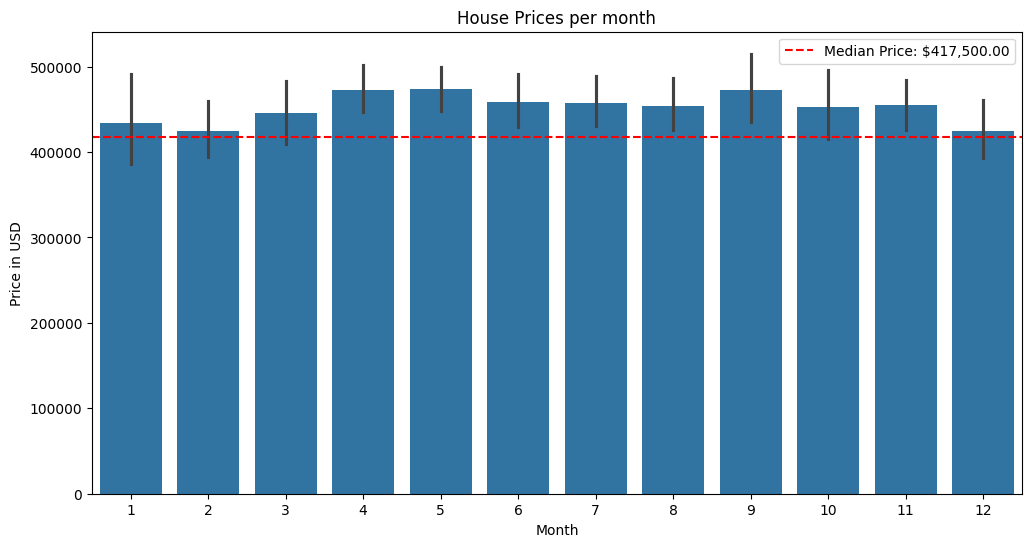

In [68]:
# Plot barplot of sale month vs price
plt.figure(figsize=(12, 6))
sns.barplot(x='sale_month', y='price', data=house_required, estimator=np.mean)

# Calculate the overall mean price
median_price = house_required['price'].median()

# Add a horizontal line indicating the mean price
plt.axhline(median_price, color='red', linestyle='--', label=f'Median Price: ${median_price:,.2f}')

# Adding titles and labels
plt.xlabel('Month')
plt.ylabel('Price in USD')
plt.title('House Prices per month')
plt.legend()

# Show the plot
plt.show()


#### Result 5: House prices are lower between December and March ####

### Plotting the houses in King's County ###

In [69]:
house_required_geo = house_required.copy()

In [71]:
import os
import plotly.express as px

In [72]:
# create a map of area, where houses from data set located
fig = px.scatter_mapbox(house_required_geo, #our data set
                        lat="lat", lon="long", #location
                        color="price", #select a column for ranking
                        hover_name="price", 
                        #hover_data=["bedrooms", "bathrooms"], 
                        color_discrete_sequence=["green"],
                        size_max=15, 
                        zoom=8, 
                        width=900, height=600, #map size
                        title =  'House prizes in Kings County (CA)')
#style of map
fig.update_layout(mapbox_style="open-street-map")
fig.show(config={'scrollZoom': False})

#### List of top 5 house recommendations ####

In [74]:
house_recommendations = house_required.groupby(['house_id', 'lat', 'long', 'bedrooms', 'condition', 'price_category', 'sqft_living', 'sqft_living15', 'basement']).median()['price']
house_recommendations = house_recommendations.to_frame().reset_index()
house_recommendations.sort_values(by='sqft_living')

,house_id,lat,long,bedrooms,condition,price_category,sqft_living,sqft_living15,basement,price
741,3438501150,47.55,-122.36,3,5,Below the median price,720.00,1080.00,no basement,300000.00
1262,7334501130,47.46,-121.75,3,3,Below the median price,930.00,1280.00,no basement,255000.00
780,3693901801,47.68,-122.40,3,3,Above the median price,940.00,1420.00,basement available,575000.00
676,3256400051,47.49,-122.34,3,3,Below the median price,960.00,1460.00,no basement,210000.00
757,3575302880,47.62,-122.06,3,5,Below the median price,970.00,1230.00,no basement,339300.00
...,...,...,...,...,...,...,...,...,...,...
353,1827200135,47.45,-122.36,4,3,Above the median price,3510.00,2530.00,basement available,554820.00
847,3935900030,47.71,-122.28,5,3,Above the median price,3540.00,2280.00,no basement,775000.00
964,5021900635,47.58,-122.22,3,3,Above the median price,3620.00,2370.00,basement available,1580000.00
1063,5700000180,47.58,-122.29,5,5,Above the median price,3920.00,1830.00,basement available,760000.00


In [76]:
# Filter where bedrooms is 6 and basement is 1, then sort by price
final = house_recommendations[(house_recommendations['bedrooms'] == 6) & (house_recommendations['basement'] == 'basement available')].sort_values(by='price').head(5)
final

,house_id,lat,long,bedrooms,condition,price_category,sqft_living,sqft_living15,basement,price
1264,7338402690,47.53,-122.29,6,3,Below the median price,2020.00,2020.00,basement available,335000.00
448,2224700045,47.76,-122.33,6,4,Below the median price,1900.00,2090.00,basement available,375000.00
870,4027700853,47.77,-122.27,6,3,Below the median price,2400.00,1290.00,basement available,387500.00
1206,7129300400,47.51,-122.26,6,3,Below the median price,2350.00,1560.00,basement available,400000.00
896,4112100101,47.55,-122.27,6,3,Below the median price,2500.00,1800.00,basement available,415000.00


In [77]:
#plotting top 5 house recommendations 

fig = px.scatter_mapbox(final, #our data set
                        lat="lat", lon="long", #location
                        color="house_id", #select a column for ranking
                        hover_name="house_id", 
                        #hover_data=["bedrooms", "bathrooms"], 
                        color_discrete_sequence=["green"],
                        size_max=85, 
                        zoom=8, 
                        width=900, height=600, #map size
                        title =  'Top 5 house recommendations in Kings County (CA)')

# Increase the size of the dots
fig.update_traces(marker=dict(size=15))  # Set the size of the markers
#style of map
fig.update_layout(mapbox_style="open-street-map")
fig.show(config={'scrollZoom': False})